In [1]:
import os
import sys
import re
import json
from datasets import (load_dataset, 
    load_from_disk,
    Dataset,
    DatasetDict,
    Value,
    Features
)

In [2]:
import torch
import random
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

In [3]:
from transformers import AutoTokenizer
from tqdm.notebook import tqdm

2021-12-01 15:38:17.350219: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


## Tokenizer

In [4]:
tokenizer = AutoTokenizer.from_pretrained('klue/roberta-large', use_fast=True)

## Law Dataset

In [5]:
law_dataset = load_dataset('metamong1/summarization_law', 
    download_mode='force_redownload',
    use_auth_token='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')

  0%|          | 0/2 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/73.1M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset law_summarization downloaded and prepared to /opt/ml/.cache/huggingface/datasets/metamong1___law_summarization/Paper Summarization/1.2.0/b422baca30e481895dd2b572a7ff9f6c6428725e575fdafb73c0aa1d62356973. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
law_train = list(law_dataset['train'])
law_docs = [data['text'] for data in law_train]

In [7]:
law_tokens = [tokenizer.tokenize(doc) for doc in tqdm(law_docs)]
law_tokens_len = list(map(len,law_tokens))

  0%|          | 0/23730 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (927 > 512). Running this sequence through the model will result in indexing errors


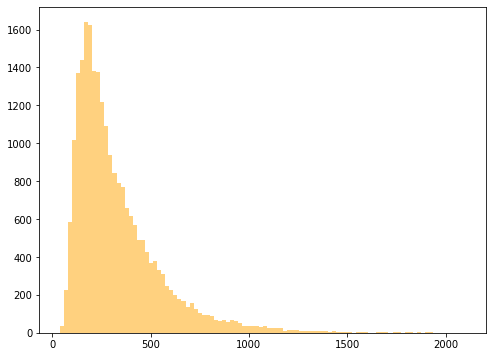

In [8]:
plt.figure(figsize = (8,6))
plt.hist(law_tokens_len, bins=100, alpha=0.5, color='orange')
plt.show()

In [10]:
law_len_vector = (np.array(law_tokens_len) > 512).astype('float')

In [11]:
print('The number of Data : %d' %len(law_len_vector))
print('The number of Data which size is over then 512 : %d' %sum(law_len_vector))

The number of Data : 23730
The number of Data which size is over then 512 : 3774


## Magazine

In [13]:
magazine_dataset = load_dataset('metamong1/summarization_magazine', 
    download_mode='force_redownload',
    use_auth_token='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')

Downloading:   0%|          | 0.00/2.65k [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/290M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/72.6M [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset magazine_summarization downloaded and prepared to /opt/ml/.cache/huggingface/datasets/metamong1___magazine_summarization/Magizine Summarization/1.0.0/506cb41eb0b96b084eafa5dd5fe3b51ff0d1061256700adf1aa92d3b19762c36. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [14]:
magazine_train = list(magazine_dataset['train'])
magazine_docs = [data['text'] for data in magazine_train]

In [34]:
magazine_tokens = [tokenizer.tokenize(doc) for doc in tqdm(magazine_docs)]
magazine_tokens_len = list(map(len,magazine_tokens))

  0%|          | 0/52691 [00:00<?, ?it/s]

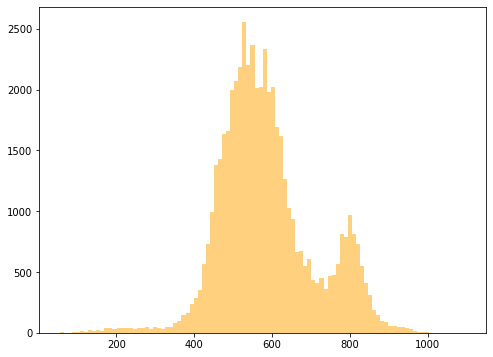

In [35]:
plt.figure(figsize = (8,6))
plt.hist(magazine_tokens_len, bins=100, alpha=0.5, color='orange')
plt.show()

In [36]:
magazine_len_vector = (np.array(magazine_tokens_len) > 512).astype('float')

In [37]:
print('The number of Data : %d' %len(magazine_len_vector))
print('The number of Data which size is over then 512 : %d' %sum(magazine_len_vector))

The number of Data : 52691
The number of Data which size is over then 512 : 38296


## News

In [38]:
news_dataset = load_dataset('metamong1/summarization_news', 
    download_mode='force_redownload',
    use_auth_token='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')

Downloading:   0%|          | 0.00/2.62k [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/287M [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset news_summarization downloaded and prepared to /opt/ml/.cache/huggingface/datasets/metamong1___news_summarization/News Summarization/1.0.0/ae25c3215dc878e979d01f1157dbfb014c0a6985fc959ae45eaf10847db75600. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [39]:
news_train = list(news_dataset['train'])
news_docs = [data['text'] for data in news_train]

In [41]:
news_tokens = [tokenizer.tokenize(doc) for doc in tqdm(news_docs)]
news_tokens_len = list(map(len,news_tokens))

  0%|          | 0/240628 [00:00<?, ?it/s]

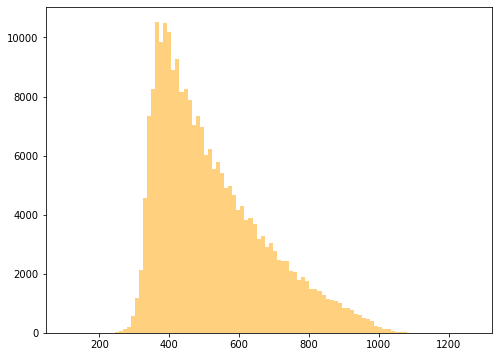

In [43]:
plt.figure(figsize = (8,6))
plt.hist(news_tokens_len, bins=100, alpha=0.5, color='orange')
plt.show()

In [44]:
news_len_vector = (np.array(news_tokens_len) > 512).astype('float')

In [45]:
print('The number of Data : %d' %len(news_len_vector))
print('The number of Data which size is over then 512 : %d' %sum(news_len_vector))

The number of Data : 240628
The number of Data which size is over then 512 : 104222


## Preprocessing

In [7]:
from abc import *

In [8]:
class Preprocessor(metaclass=ABCMeta) :
    def __init__(self ) :
        # 일본어, 한국어, 한자, 기본 문자, 구두점, 문장 기호
        self.outrange_comp = re.compile('[^\u3040-\u30ff\
            \uac00-\ud7af\
            \uac00-\ud7af\
            \u4e00-\u9fff\
            \u0000-\u007f\
            \u2000-\u206f\
            \u25a0-\u25ff]') 

    @abstractmethod
    def for_train(self, data) :
        pass

    @abstractmethod
    def for_test(self, data) :
        pass

    def strip(self, txt) :
        txt = re.sub('\s+' , ' ', txt) 
        return txt.strip()

    def check_keys(self, data) :
        if 'text' not in data.keys() or 'title' not in data.keys() :
            raise KeyError('Wrong Data keys')

    def doc_preprocess(self, txt) :
        txt = self.outrange_comp.sub(' ', txt)
        return txt

In [9]:
class DocsPreprocessor(Preprocessor) :
    def __init__(self) :
        super().__init__()

    def base_preprocess(self, text) :
        text = re.sub(r'\n', ' ', text)
        return text

    def for_train(self, data) :
        self.check_keys(data)
        title = data['title'] # title preprocessing
        title = self.base_preprocess(title)
        title = self.doc_preprocess(title)
        title = self.strip(title)

        text = data['text'] # text preprocessing
        text = self.base_preprocess(text)
        text = self.doc_preprocess(text)
        text = self.strip(text)

        data['text'] = text 
        data['title'] = title
        return data

    def for_test(self, data) :
        self.check_keys(data)
        text = data['text']
        text = self.base_preprocess(text)
        text = self.doc_preprocess(text)
        text = self.strip(text)
        data['text'] = text 
        return data

In [10]:
preprocessor = DocsPreprocessor()

## UNK Token

In [26]:
law_unk_counts = []

In [27]:
for doc in tqdm(law_docs) :
    ids = tokenizer.encode(doc)
    unk_vector = (np.array(ids) == tokenizer.unk_token_id).astype('float')
    count = np.sum(unk_vector)
    law_unk_counts.append(count)

  0%|          | 0/23730 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (922 > 512). Running this sequence through the model will result in indexing errors


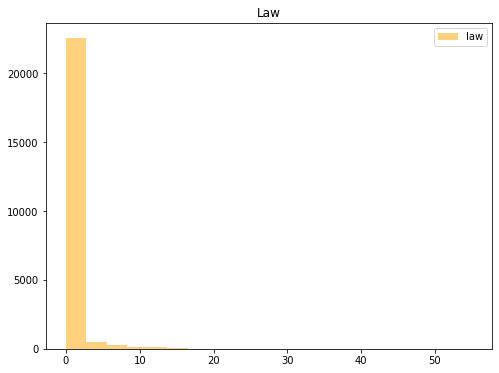

In [32]:
plt.figure(figsize = (8,6))
plt.title('Law')
plt.hist(law_unk_counts, bins=20, color='orange', label='law', alpha=0.5)
plt.legend()
plt.show()

In [29]:
magazine_unk_counts = []

In [30]:
for doc in tqdm(magazine_docs) :
    ids = tokenizer.encode(doc)
    unk_vector = (np.array(ids) == tokenizer.unk_token_id).astype('float')
    count = np.sum(unk_vector)
    magazine_unk_counts.append(count)

  0%|          | 0/52691 [00:00<?, ?it/s]

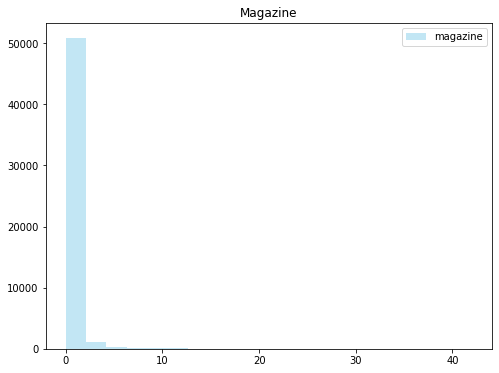

In [36]:
plt.figure(figsize = (8,6))
plt.title('Magazine')
plt.hist(magazine_unk_counts, bins=20, color='skyblue', label='magazine', alpha=0.5)
plt.legend()
plt.show()

In [33]:
news_unk_counts = []

In [34]:
for doc in tqdm(news_docs) :
    ids = tokenizer.encode(doc)
    unk_vector = (np.array(ids) == tokenizer.unk_token_id).astype('float')
    count = np.sum(unk_vector)
    news_unk_counts.append(count)

  0%|          | 0/240628 [00:00<?, ?it/s]

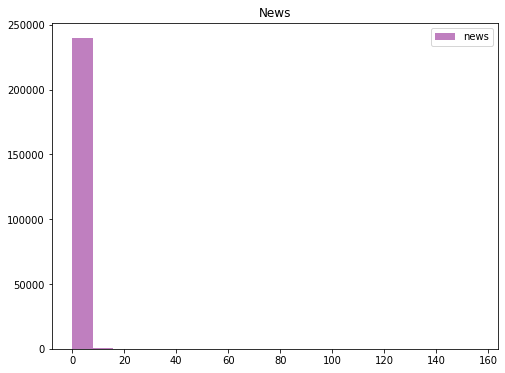

In [35]:
plt.figure(figsize = (8,6))
plt.title('News')
plt.hist(news_unk_counts, bins=20, color='purple', label='news', alpha=0.5)
plt.legend()
plt.show()